In [3]:
import pandas as pd

# Load the two CSV files into pandas DataFrames
file1 = "~/Stat 486/books data/books_data.csv"  # Replace with your first file name
file2 = "~/Stat 486/books data/Books_rating.csv"  # Replace with your second file name

df1 = pd.read_csv(file1)
df2 = pd.read_csv(file2)

# Merge the two DataFrames on the 'Book Title' column
merged_df = pd.merge(df1, df2, on="Title", how="inner")  # Use 'left', 'right', or 'outer' if needed

# Save the merged DataFrame to a new CSV file
output_file = "merged_books.csv"
merged_df.to_csv(output_file, index=False)

print(f"Merged file saved to {output_file}")

Merged file saved to merged_books.csv


In [4]:
# reading in the merged data
import pandas as pd
data = pd.read_csv("merged_books.csv")

In [5]:
from fractions import Fraction
import numpy as np
books = data 
# Convert the 'review/helpfulness' column to decimals
books.loc[books.loc[:,'review/helpfulness']!='0/0','review/helpfulness'] = books.loc[books.loc[:,'review/helpfulness']!='0/0','review/helpfulness'].apply(lambda x: float(Fraction(x)))
books['review/helpfulness'] = pd.to_numeric(data['review/helpfulness'], errors='coerce')

In [6]:
# fixing the date column
def parse_partial_date(date_str):
    if pd.isna(date_str):
        return np.nan
    try:
        # Try to parse full date
        return pd.to_datetime(date_str, format='%Y-%m-%d')
    except ValueError:
        try:
            # Try to parse year-month
            return pd.to_datetime(date_str, format='%Y-%m')
        except ValueError:
            try:
                # Try to parse just year
                return pd.to_datetime(date_str, format='%Y')
            except ValueError:
                return np.nan
books['parsedDate'] = books['publishedDate'].apply(parse_partial_date)

In [7]:
# Take a 1% random sample
sample_df = books.sample(frac=0.01, random_state=42)  # Set random_state for reproducibility

# Save the sample to a new CSV file
sample_df.to_csv("books_subset.csv", index=False)  # Replace with your desired output file name

print("Sample saved to 'sampled_data.csv'")

Sample saved to 'sampled_data.csv'


In [14]:
books.loc[:,'parsedDate']

0         1996-01-01
1         2005-01-01
2         2005-01-01
3         2005-01-01
4         2005-01-01
             ...    
2999995   2003-08-12
2999996   1998-01-01
2999997   1998-01-01
2999998   1998-01-01
2999999   1998-01-01
Name: parsedDate, Length: 3000000, dtype: datetime64[ns]

In [19]:
# creating summary statistics for variables in data
numeric_vars = ['Price', 'review/helpfulness', 'ratingsCount', 'review/score']

summary_stats = data[numeric_vars].describe().T

categorical_vars = ['authors', 'categories', 'publisher']

categorical_summary = {}
for var in categorical_vars:
    categorical_summary[var] = {
        'sample_size': data[var].nunique(),
        'category_counts': data[var].value_counts()
    }
# Combine numeric and categorical data summaries for easy reporting
print("Numeric Variable Summary:\n", summary_stats)
print("\nCategorical Variable Summary:\n")
for var, summary in categorical_summary.items():
    print(f"{var} - Sample size: {summary['sample_size']}")
    print(f"Category counts:\n{summary['category_counts'].head(10)}")  # Show top 10 counts for brevity


Numeric Variable Summary:
                         count        mean         std  min    25%        50%  \
Price                481171.0   21.762656   26.206541  1.0  10.78  14.930000   
review/helpfulness  2114268.0    0.698728    0.345454  0.0   0.50   0.833333   
ratingsCount        1639306.0  272.064662  788.772080  1.0   3.00  10.000000   
review/score        3000000.0    4.215289    1.203054  1.0   4.00   5.000000   

                      75%     max  
Price               23.95   995.0  
review/helpfulness   1.00     3.0  
ratingsCount        55.00  4895.0  
review/score         5.00     5.0  

Categorical Variable Summary:

authors - Sample size: 127278
Category counts:
authors
['J. R. R. Tolkien']             37268
['Jane Austen']                  36532
['Charles Dickens']              21270
['John Steinbeck']               17027
['John Ronald Reuel Tolkien']    12906
['Lewis Carroll']                12847
['Kurt Vonnegut']                12124
['Harper Lee']                  

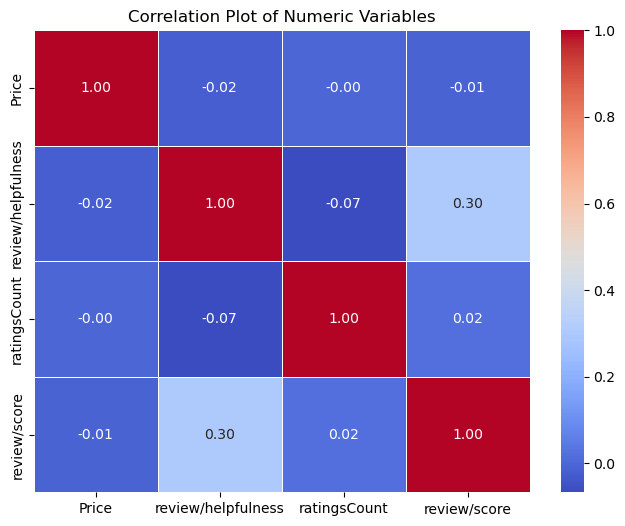

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Creating the correlation matrix for numeric variables
corr_matrix = data[numeric_vars].corr()

# Plotting the correlation heatmap
plt.figure(figsize=(8, 6))  # Adjust the size as needed
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Display the plot
plt.title('Correlation Plot of Numeric Variables')
plt.savefig('cor_plot.png')
plt.show()

In [8]:
sample_df.columns

Index(['Title', 'description', 'authors', 'image', 'previewLink', 'publisher',
       'publishedDate', 'infoLink', 'categories', 'ratingsCount', 'Id',
       'Price', 'User_id', 'profileName', 'review/helpfulness', 'review/score',
       'review/time', 'review/summary', 'review/text', 'parsedDate'],
      dtype='object')

In [10]:
sample_df.shape

(30000, 20)

In [30]:
tab = pd.read_csv("books_tab_reduced.csv")
tab_books = tab.drop(columns=['Title'])

In [31]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

## data preprocessing and data cleaning
categorical_cols = ['authors', 'publisher', 'categories']
numerical_cols = ['n', 'Price', 'review/score', 'year'] 

In [32]:
# Check how many missing values are in each column
missing_data = tab.isnull().sum()
print(missing_data)

Title               0
n                   0
review/score        0
authors             0
publisher           0
year                0
categories          0
Price           36723
dtype: int64


In [33]:
# Step 2: Preprocessing - Standardize numerical data
scaler = StandardScaler()
tab_books[numerical_cols] = tab_books[numerical_cols].fillna(tab_books[numerical_cols].median())
tab_books[numerical_cols] = scaler.fit_transform(tab_books[numerical_cols])

# One-Hot Encoding for categorical columns
tab_books = pd.get_dummies(tab_books, columns=categorical_cols, drop_first=True)

# Check the first few rows of `date_num` to confirm the changes
print(tab_books.head())

          n  review/score      year     Price  \
0 -0.100915      0.507189 -0.617964 -0.152294   
1  1.006144      0.306308  0.045814 -0.486965   
2 -0.100915      0.925927  0.562086 -0.152294   
3 -0.093280     -0.330287  1.004605 -0.152294   
4 -0.116185      0.925927 -1.060483 -0.152294   

   authors_["America's Test Kitchen"]  \
0                               False   
1                               False   
2                               False   
3                               False   
4                               False   

   authors_["Andrea O'Reilly", 'Sharon Abbey']  authors_["Andrea U'Ren"]  \
0                                        False                     False   
1                                        False                     False   
2                                        False                     False   
3                                        False                     False   
4                                        False                     False   

 

In [36]:
tab_books_copy = tab_books.copy()
np.random.seed(123)  # For reproducibility
tab_books_subset = tab_books_copy.sample(frac=0.1)
tab_books_subset.shape

In [37]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Create a range of K values to test
K_range = range(2, 11)  # testing from 2 to 10 clusters

# Lists to store inertia and silhouette scores
inertia = []
sil_scores = []

# Compute K-means for each K and calculate inertia and silhouette scores
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(tab_books_subset)
    
    # Calculate inertia (sum of squared distances to the closest centroid)
    inertia.append(kmeans.inertia_)
    
    # Calculate silhouette score (a measure of how similar each point is to its own cluster)
    sil_scores.append(silhouette_score(tab_books_subset, kmeans.labels_))

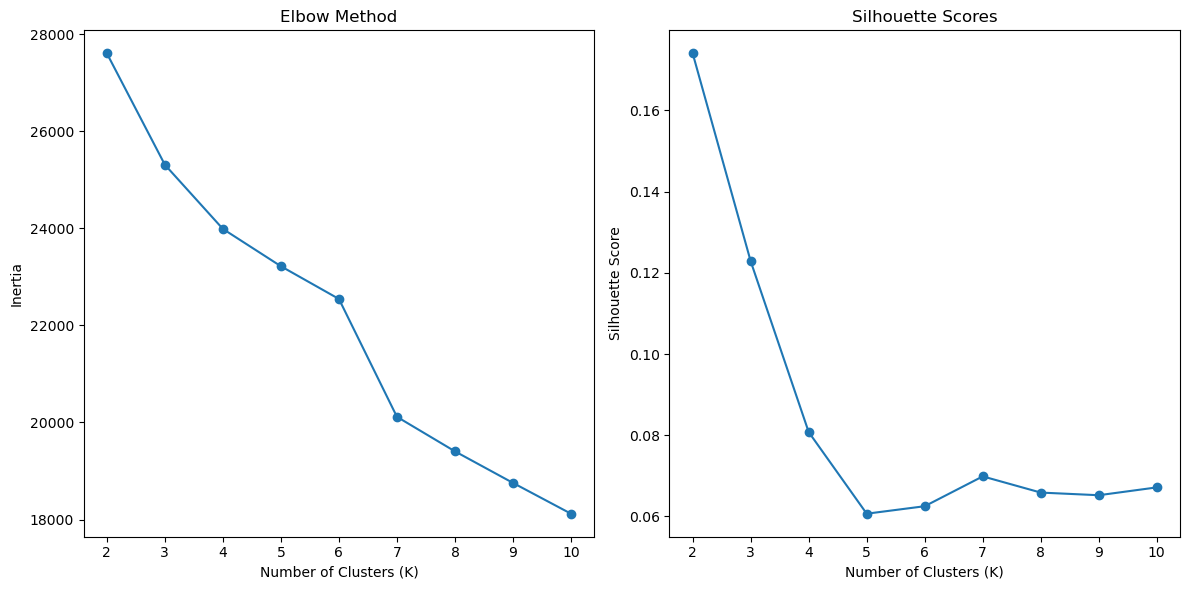

In [53]:
# Plot Elbow Method (Inertia vs. K)
plt.figure(figsize=(12, 6))

# Elbow plot: Inertia vs. K
plt.subplot(1, 2, 1)
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')

# Silhouette plot: K vs. Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(K_range, sil_scores, marker='o')
plt.title('Silhouette Scores')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.savefig('KClusts.png')
plt.show()

In [39]:
import matplotlib.pyplot as plt

# Fit KMeans with the number of clusters (e.g., K=5)
kmeans_tabular = KMeans(n_clusters=7, random_state=42)
kmeans_tabular_labels = kmeans_tabular.fit_predict(tab_books)
# Add the cluster labels to the DataFrame
tab_books_copy['cluster'] = kmeans_tabular_labels


KeyError: "Columns not found: 'categories', 'authors', 'publisher'"

In [42]:
tab['cluster'] = kmeans_tabular_labels
# Summarize numerical features by cluster
tabular_cluster_summary = tab.groupby('cluster')[numerical_cols].mean()

# Summarize categorical features by cluster (most frequent value)
tabular_categorical_summary = tab.groupby('cluster')[categorical_cols].agg(lambda x: x.mode()[0])

print("Tabular Data - Cluster Summary (Numerical):")
print(tabular_cluster_summary)

print("Tabular Data - Cluster Summary (Categorical):")
print(tabular_categorical_summary)

Tabular Data - Cluster Summary (Numerical):
                   n       Price  review/score         year
cluster                                                    
0          21.577025   21.006198      3.872447  2002.990565
1           3.628812  139.420810      4.256468  2003.954784
2           6.325476   23.833380      2.473061  2003.842432
3          12.324554   21.355983      4.421882  1963.095219
4        3372.812500   17.815000      4.172485  2005.312500
5          18.259693   19.942374      4.638514  2013.906793
6           7.524602   22.623030      4.815484  1997.979509
Tabular Data - Cluster Summary (Categorical):
                                           authors            publisher  \
cluster                                                                   
0                          ['William Shakespeare']   Simon and Schuster   
1                                ['James Herbert']            Routledge   
2                ['National Learning Corporation']            Routledg

In [43]:
# Visualizing the clustering result (PCA for 2D visualization)
from sklearn.decomposition import PCA

# Reduce to 2D using PCA for visualization
pca = PCA(n_components=2)
reduced_data_tabular = pca.fit_transform(tab_books)

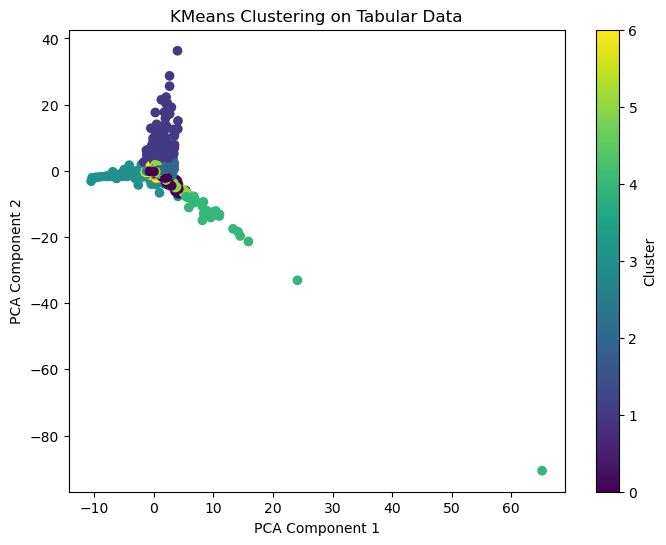

In [52]:
plt.figure(figsize=(8, 6))
plt.scatter(reduced_data_tabular[:, 0], reduced_data_tabular[:, 1], c=kmeans_tabular_labels, cmap='viridis', marker='o')
plt.title("KMeans Clustering on Tabular Data")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label='Cluster')
plt.savefig('bookClusts.png')
plt.show()

In [47]:
max_index = np.argmax(reduced_data_tabular[:, 0])

reduced_data_tabular_new = np.delete(reduced_data_tabular, max_index, axis=0)
kmeans_tabular_labels_new = np.delete(kmeans_tabular_labels, max_index, axis=0)

In [49]:
max_index = np.argmax(reduced_data_tabular_new[:, 0])

reduced_data_tabular_new = np.delete(reduced_data_tabular_new, max_index, axis=0)
kmeans_tabular_labels_new = np.delete(kmeans_tabular_labels_new, max_index, axis=0)

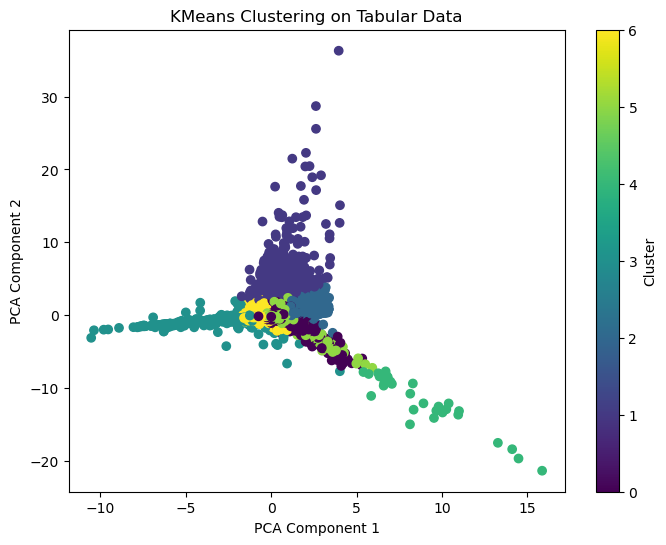

In [51]:
plt.figure(figsize=(8, 6))
plt.scatter(reduced_data_tabular_new[:, 0], reduced_data_tabular_new[:, 1], c=kmeans_tabular_labels_new, cmap='viridis', marker='o')
plt.title("KMeans Clustering on Tabular Data")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label='Cluster')
plt.savefig('bookClusts2.png')
plt.show()